In [27]:
# IMPORTING SOME NECESSARY LABRARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings ('ignore')

In [3]:
# LOADING DATA SET 
df = pd.read_csv ('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')


In [4]:
# DISPLAYING DATA SET 
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
#  CHECKING INFORMATION ABOUT DATA SET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### IN THIS DATA SET THERE ARE 158 ROWS × 12 COLUMNS... THERE ARE 2 OBJECT & 1 INTEGER & 9 FLOAT DATA TYPES ARE PRECENT



In [6]:
# CHECKING NULL VALUES 
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### BY LOOKING THIS THERE IS NO NULL VALUES ARE PRECENT IN DATA SET 

In [7]:
# CHECK STATISTICS OF DATA SET
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
# correlation 
correlation = df.corr()

<AxesSubplot:>

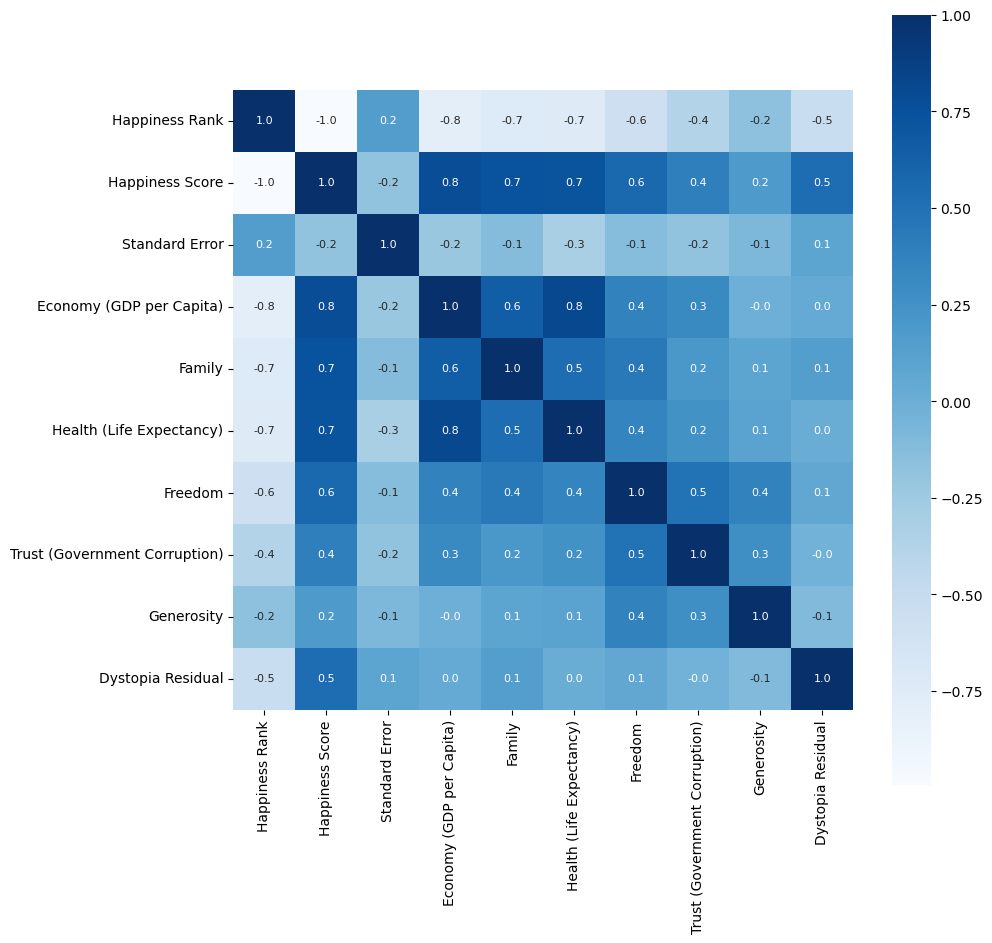

In [10]:
# PLOTING HEATMAP 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap= 'Blues')

In [18]:
# SEPRATING LABELS & FEATURES 
X = df.drop   (columns=['Country','Region','Happiness Score'], axis=1)
Y = df ['Happiness Score']

In [19]:
print(X)

     Happiness Rank  Standard Error  Economy (GDP per Capita)   Family  \
0                 1         0.03411                   1.39651  1.34951   
1                 2         0.04884                   1.30232  1.40223   
2                 3         0.03328                   1.32548  1.36058   
3                 4         0.03880                   1.45900  1.33095   
4                 5         0.03553                   1.32629  1.32261   
..              ...             ...                       ...      ...   
153             154         0.03464                   0.22208  0.77370   
154             155         0.03656                   0.28665  0.35386   
155             156         0.05015                   0.66320  0.47489   
156             157         0.08658                   0.01530  0.41587   
157             158         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557

In [20]:
print(Y)

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64


In [21]:
# SPLITING DATA INTO IN TRAIN TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) 

In [22]:
# CHECK SPLITING SHAPE OF DATA SET
print (X.shape, X_train.shape, X_test.shape)

(158, 9) (126, 9) (32, 9)


In [23]:
# MODEL LOADING  
regressor = LinearRegression()

In [24]:
# TRAINING MODEL
regressor.fit(X_train, Y_train)

LinearRegression()

In [25]:
# TRAINING DATA PREDICTION
training_data_prediction = regressor.predict(X_train)

In [29]:
# FINDING R SQUARE VALUE
r2_train = metrics.r2_score(Y_train,training_data_prediction ) 
print ('R SQUARE VALUE :',r2_train )

R SQUARE VALUE : 0.9999999372718591


In [30]:
# TESTING DATA PREDICTION 
test_data_prediction = regressor.predict(X_test)

In [31]:
# FINDING R SQUARE VALUE
r2_test = metrics.r2_score (Y_test,test_data_prediction )
print ('R SQUAR VALUE :', r2_test )

R SQUAR VALUE : 0.9999999542684379


In [32]:
# SAVING MODEL 
import joblib
joblib.dump (r2_train, "World Happiness Report Project")

['World Happiness Report Project']